### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [92]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [93]:
df.groupby('sex')[['total_bill']].mean()

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/2388094044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [94]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [95]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/1243499625.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [96]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='prod')

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/3330428204.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='prod')


smoker,Yes,No
sex,,
Male,2.173399e+78,1.413952e+122
Female,4.250240e+39,1.458771e+66


In [97]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc=['mean','count','max','min','median','std'])

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/256715027.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc=['mean','count','max','min','median','std'])
/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/256715027.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc=['mean','count','max','min','median','std'])
/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/256715027.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a 

mean            count        max          min       median  \
smoker        Yes         No   Yes  No    Yes     No   Yes    No    Yes   
sex                                                                       
Male    22.284500  19.791237    60  97  50.81  48.33  7.25  7.51  20.39   
Female  17.977879  18.105185    33  54  44.30  35.83  3.07  7.25  16.27   

                    std            
smoker     No       Yes        No  
sex                                
Male    18.24  9.911845  8.726566  
Female  16.69  9.189751  7.286455

In [98]:
# all cols together
df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip','size'],aggfunc=['count','mean'],margins=True)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/2344945039.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip','size'],aggfunc=['count','mean'],margins=True)
/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/2344945039.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip','size'],aggfunc=['count','mean'],margins=True)


count                                                   mean            \
        size           tip           total_bill                size             
smoker   Yes   No  All Yes   No  All        Yes   No  All       Yes        No   
sex                                                                             
Male      60   97  157  60   97  157         60   97  157  2.500000  2.711340   
Female    33   54   87  33   54   87         33   54   87  2.242424  2.592593   
All       93  151  244  93  151  244         93  151  244  2.408602  2.668874   

                                                                      \
                       tip                     total_bill              
smoker       All       Yes        No       All        Yes         No   
sex                                                                    
Male    2.630573  3.051167  3.113402  3.089618  22.284500  19.791237   
Female  2.459770  2.931515  2.773519  2.833448  17.977879  18.105185   
All     2.569672  3.008710  2.991854  2.998279  20.756344  19.188278   

                   
                   
smoker        All  
sex                
Male    20.744076  
Female  18.056897  
All     19.785943

In [99]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/3218821712.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [100]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'])

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/1883326029.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'])


size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [101]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/2565999092.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [102]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_64191/1561592577.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [103]:
# plotting graphs
df=pd.read_csv('../datasets/expense_data.csv')

In [104]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [105]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [107]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] 

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [109]:
df['month'] = df['Date'].dt.month_name()
df['month']

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: month, Length: 277, dtype: object

In [110]:
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March


<Axes: xlabel='month'>

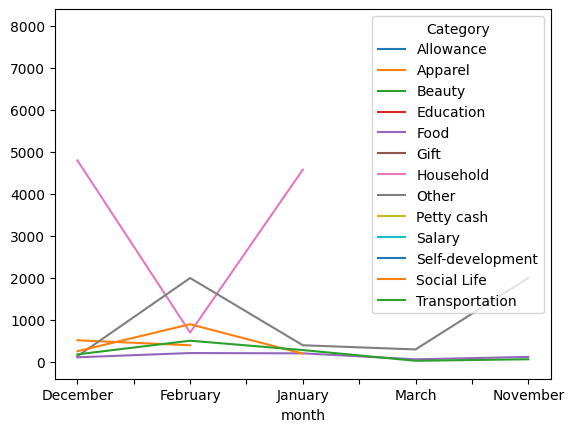

In [112]:
df.pivot_table(index='month',columns='Category',values='INR').plot()

<Axes: xlabel='month'>

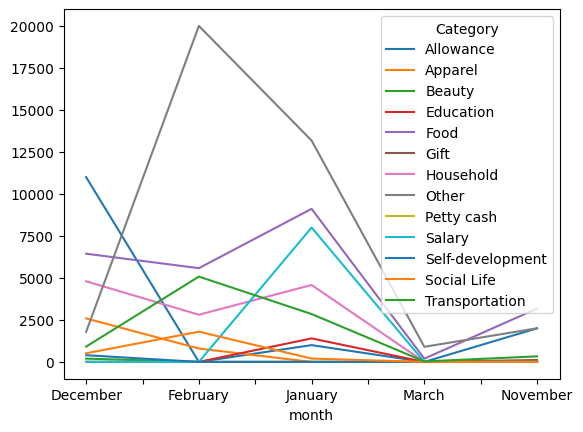

In [113]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

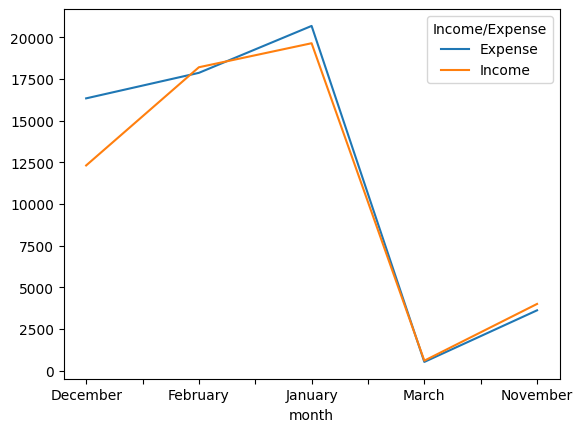

In [114]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

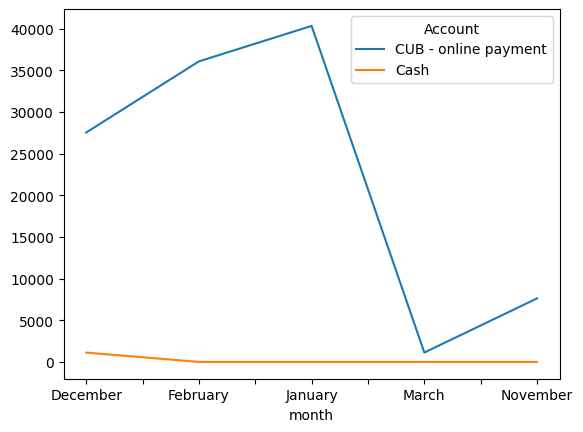

In [115]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

## Vectorized String Operations 

In [7]:
a = np.array([1,2,3,4])
a*4

array([ 4,  8, 12, 16])

In [ ]:
s = pd.Series(['cat','mat',None,'rat'])
# string accessor
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [13]:
df = pd.read_csv('../datasets/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [32]:
# Common Functions
# lower/upper/capitalize/title
df['Name'].str.upper()
df['Name'].str.lower()
df['Name'].str.capitalize()
df['Name'].str.title()
# len()
df['Name'][df['Name'].str.len() == 82].values[0]
# strip
"         fahim          ".strip()
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# split -> get
df['lastname'] = df['Name'].str.split(',').str.get(0)
# .str.get(0)  →  Gets the first element from each list.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [ ]:
df[['title','firstname']] = (
    df['Name']
      .str.split(',').str.get(1)        # Splits the name at the comma and gets the second part (index 1).
      .str.strip()                      # remove leading/trailing spaces
      .str.split(' ', n=1, expand=True) # split into 2 parts: title + firstname
)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [54]:
df['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [58]:
# replace
df['title'] = df['title'].str.replace('Ms.','Miss.')
df['title'] = df['title'].str.replace('Mlle.','Miss.')

In [59]:
df['title'].value_counts()

title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [74]:
# filtering
# startswith/endswith
df[df['firstname'].str.startswith('A')]
df[df['firstname'].str.endswith('A')]
# isdigit/isalpha...
df[df['firstname'].str.isalpha()]
df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [79]:
# applying regex
# contains
# search john -> both case
df[df['firstname'].str.contains('john',case=False)]
# find lastnames with start and end char not vowel
df[df['lastname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]
# find lastnames with start and end char vowel
df[df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


In [92]:
# slicing 
df['Name'].str[::-1]

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object

### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [95]:
# creating a timestamp
pd.Timestamp('2025/12/12')

Timestamp('2025-12-12 00:00:00')

In [96]:
type(pd.Timestamp('2025/12/12'))

pandas._libs.tslibs.timestamps.Timestamp

In [99]:
# variations
pd.Timestamp('2025-12-12')
pd.Timestamp('2025,12,12')


Timestamp('2025-12-01 00:00:00')

In [103]:
# year only
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [105]:
# using text
pd.Timestamp('6th January 2025')

Timestamp('2025-01-06 00:00:00')

In [109]:
# providing time also
pd.Timestamp('5th January 2025 4:41PM')

Timestamp('2025-01-05 16:41:00')

In [118]:
# using datetime.datetime object
import datetime as dt                      #   python

x = pd.Timestamp(dt.datetime(2025,1,5,4,43,56))
x

Timestamp('2025-01-05 04:43:56')

In [127]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

In [ ]:
# why separate objects to handle data and time when python already has datetime functionality?


- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [134]:
date = np.array('2025-01-12',dtype=np.datetime64)
date

array('2025-01-12', dtype='datetime64[D]')

In [136]:
date+12
date +np.arange(12)

array(['2025-01-12', '2025-01-13', '2025-01-14', '2025-01-15',
       '2025-01-16', '2025-01-17', '2025-01-18', '2025-01-19',
       '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [ ]:
# from strings
pd.DatetimeIndex(['2025/1/1','2024/1/1','2023/1/1'])
type(pd.DatetimeIndex(['2025/1/1','2024/1/1','2023/1/1']))

DatetimeIndex(['2025-01-01', '2024-01-01', '2023-01-01'], dtype='datetime64[ns]', freq=None)

In [140]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2025,1,1),dt.datetime(2024,1,1),dt.datetime(2023,1,1)])

DatetimeIndex(['2025-01-01', '2024-01-01', '2023-01-01'], dtype='datetime64[ns]', freq=None)

In [144]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2025,1,1),pd.Timestamp(2024,1,1),pd.Timestamp(2023,1,1)])
dt_index

DatetimeIndex(['2025-01-01', '2024-01-01', '2023-01-01'], dtype='datetime64[ns]', freq=None)

In [145]:
# using datatimeindex as series index

pd.Series([1,2,3],index=dt_index)

2025-01-01    1
2024-01-01    2
2023-01-01    3
dtype: int64

### date_range function

In [149]:
# generate daily dates in a given range
pd.date_range(start='2025/12/12',end='2025/12/24',freq='D')

DatetimeIndex(['2025-12-12', '2025-12-13', '2025-12-14', '2025-12-15',
               '2025-12-16', '2025-12-17', '2025-12-18', '2025-12-19',
               '2025-12-20', '2025-12-21', '2025-12-22', '2025-12-23',
               '2025-12-24'],
              dtype='datetime64[ns]', freq='D')

In [151]:
pd.date_range(start='2025/12/12',end='2025/12/24',freq='3D')

DatetimeIndex(['2025-12-12', '2025-12-15', '2025-12-18', '2025-12-21',
               '2025-12-24'],
              dtype='datetime64[ns]', freq='3D')

In [156]:
# B -> business days
pd.date_range(start='2025/12/12',end='2025/12/24',freq='B')

DatetimeIndex(['2025-12-12', '2025-12-15', '2025-12-16', '2025-12-17',
               '2025-12-18', '2025-12-19', '2025-12-22', '2025-12-23',
               '2025-12-24'],
              dtype='datetime64[ns]', freq='B')

In [160]:
# W -> one week per day
pd.date_range(start='2025/12/12',end='2025/12/24',freq='W')

DatetimeIndex(['2025-12-14', '2025-12-21'], dtype='datetime64[ns]', freq='W-SUN')

In [175]:
# H -> Hourly data(factor)
pd.date_range(start='2025/12/12',end='2025/12/24',freq='6h')

DatetimeIndex(['2025-12-12 00:00:00', '2025-12-12 06:00:00',
               '2025-12-12 12:00:00', '2025-12-12 18:00:00',
               '2025-12-13 00:00:00', '2025-12-13 06:00:00',
               '2025-12-13 12:00:00', '2025-12-13 18:00:00',
               '2025-12-14 00:00:00', '2025-12-14 06:00:00',
               '2025-12-14 12:00:00', '2025-12-14 18:00:00',
               '2025-12-15 00:00:00', '2025-12-15 06:00:00',
               '2025-12-15 12:00:00', '2025-12-15 18:00:00',
               '2025-12-16 00:00:00', '2025-12-16 06:00:00',
               '2025-12-16 12:00:00', '2025-12-16 18:00:00',
               '2025-12-17 00:00:00', '2025-12-17 06:00:00',
               '2025-12-17 12:00:00', '2025-12-17 18:00:00',
               '2025-12-18 00:00:00', '2025-12-18 06:00:00',
               '2025-12-18 12:00:00', '2025-12-18 18:00:00',
               '2025-12-19 00:00:00', '2025-12-19 06:00:00',
               '2025-12-19 12:00:00', '2025-12-19 18:00:00',
               '2025-12-

In [174]:
# M -> Month end
pd.date_range(start='2025/12/12',end='2026/6/24',freq='ME')

DatetimeIndex(['2025-12-31', '2026-01-31', '2026-02-28', '2026-03-31',
               '2026-04-30', '2026-05-31'],
              dtype='datetime64[ns]', freq='ME')

In [167]:
# MS -> Month start
pd.date_range(start='2025/12/12',end='2026/6/24',freq='MS')

DatetimeIndex(['2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
               '2026-05-01', '2026-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [173]:
# A -> Year end
pd.date_range(start='2025/12/12',end='2029/6/24',freq='YE')

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [172]:
# using periods(number of results)
pd.date_range(start='2025/12/12',periods=25,freq='ME')

DatetimeIndex(['2025-12-31', '2026-01-31', '2026-02-28', '2026-03-31',
               '2026-04-30', '2026-05-31', '2026-06-30', '2026-07-31',
               '2026-08-31', '2026-09-30', '2026-10-31', '2026-11-30',
               '2026-12-31', '2027-01-31', '2027-02-28', '2027-03-31',
               '2027-04-30', '2027-05-31', '2027-06-30', '2027-07-31',
               '2027-08-31', '2027-09-30', '2027-10-31', '2027-11-30',
               '2027-12-31'],
              dtype='datetime64[ns]', freq='ME')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [176]:
# simple series example
s =  pd.Series(['2025/1/1','2024/1/1','2023/1/1'])
pd.to_datetime(s)

0   2025-01-01
1   2024-01-01
2   2023-01-01
dtype: datetime64[ns]

In [182]:
pd.to_datetime(s).dt.month_name()
pd.to_datetime(s).dt.day_name()

0    Wednesday
1       Monday
2       Sunday
dtype: object

In [ ]:
# with errors
s =  pd.Series(['2025/1/1','2024/100/1','2023/1/1'])
pd.to_datetime(s,errors='coerce')

0   2025-01-01
1          NaT
2   2023-01-01
dtype: datetime64[ns]

In [185]:
df=pd.read_csv('../datasets/expense_data.csv')
df.shape

(277, 11)

In [186]:
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0


In [189]:
df['Date'] = pd.to_datetime(df['Date'])

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

Accessor object for datetimelike properties of the Series values.

In [210]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00


In [ ]:
df[df['Date'].dt.is_year_start]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
151,2022-01-01 21:46:00,CUB - online payment,Food,NaN,Snacks,85.0,Expense,NaN,85.0,INR,85.0
152,2022-01-01 21:45:00,CUB - online payment,Allowance,NaN,From dad,1000.0,Income,NaN,1000.0,INR,1000.0


In [196]:
df[df['Date'].dt.is_quarter_start]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
151,2022-01-01 21:46:00,CUB - online payment,Food,NaN,Snacks,85.0,Expense,NaN,85.0,INR,85.0
152,2022-01-01 21:45:00,CUB - online payment,Allowance,NaN,From dad,1000.0,Income,NaN,1000.0,INR,1000.0


In [ ]:
%pip install Matplotlib

In [204]:
# plot graph
import matplotlib.pyplot as plt

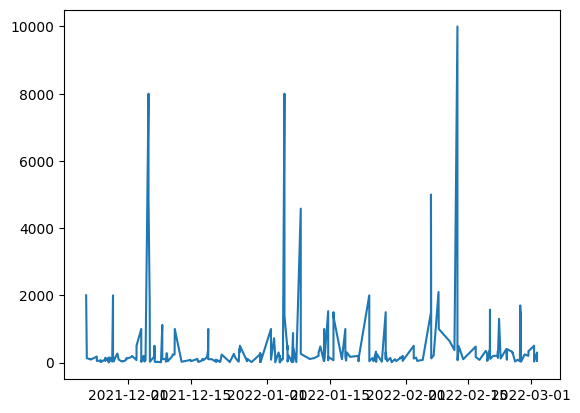

In [209]:
plt.plot(df['Date'],df['INR'])

In [219]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()

In [221]:
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday


<Axes: xlabel='day_name'>

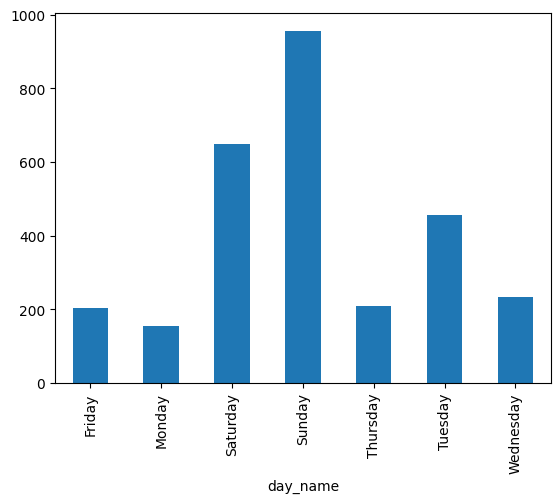

In [223]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [224]:
df['month_name'] = df['Date'].dt.month_name()
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March


<Axes: xlabel='month_name'>

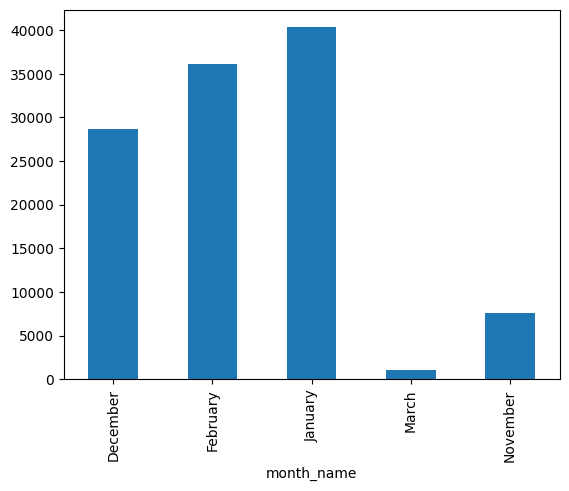

In [225]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')